In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection as ms

In [2]:
df = pd.read_csv('obesitas.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity


In [3]:
df.shape

(2111, 17)

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight


In [5]:
X = df.drop(['NObeyesdad'], axis=1)
y = df['NObeyesdad']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
X_train.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

In [8]:
import category_encoders as ce

In [11]:
encoder = ce.OrdinalEncoder(['gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [12]:
X_train.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1295,1,38.148845,1.557808,79.661693,1,1,2.000000,3.000000,1,1,1.274774,1,0.000000,0.000000,1,1
1627,2,40.366238,1.722396,109.349025,1,1,2.281963,3.770379,1,1,1.000000,1,1.330519,0.000000,2,1
1388,1,39.648946,1.572791,80.086524,1,1,2.071622,2.977909,1,1,1.468297,1,0.000000,0.000000,2,1
1318,2,23.237302,1.761008,97.829344,1,1,2.000000,3.000000,1,1,2.988771,1,2.429923,1.978043,2,2
648,1,22.547298,1.722461,51.881263,1,1,2.663421,3.000000,2,1,1.041110,1,0.794402,1.391948,2,2


In [15]:
X_train.dtypes

Gender                              int32
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int32
FAVC                                int32
FCVC                              float64
NCP                               float64
CAEC                                int32
SMOKE                               int32
CH2O                              float64
SCC                                 int32
FAF                               float64
TUE                               float64
CALC                                int32
MTRANS                              int32
dtype: object

In [16]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [17]:
y_pred_en = clf_en.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8345


In [19]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['Obesity', 'Obesity', 'Obesity', ..., 'Overweight', 'Overweight',
       'Obesity'], dtype=object)

In [20]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8507


In [22]:
print('training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

training set score: 0.8507
Test set score: 0.8345


In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 40  25   0   0]
 [  3  40   0  14]
 [  0   0 178  11]
 [  0   6  11  95]]


Text(0.5, 23.52222222222222, 'PREDICTED')

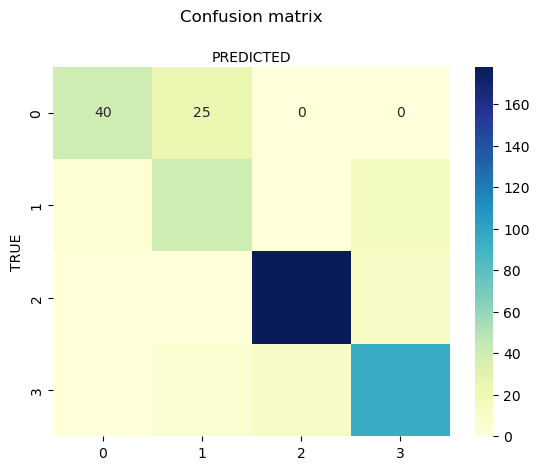

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('TRUE')
plt.xlabel('PREDICTED')

In [27]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 320.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 392.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
